<!DOCTYPE html>
<html>
<head>
  <title>Population Density Image</title>
</head>
<body>
  <h1>Extract Population Density from raster file</h1>
  <p>Doxsey-Whitfield et al. (2015): Taking Advantage of the Improved Availability of Census Data: A First Look at the Gridded Population of the World, Version 4 (GPWv4)</p>

  <img src="https://sedac.ciesin.columbia.edu/geoserver/ows?service=WMS&version=1.1.0&request=GetMap&bbox=-180,-60,180,85&width=375&height=151&srs=EPSG:4326&format=image%2Fpng&transparent=true&layers=gpw-v4:gpw-v4-population-density-rev11_2020,cartographic:national-boundaries" alt="Population Density Image">

  <p>Variable: POP_DENS - AVERAGE POPULATION DENSITY in 2020</p>
  <p>Resolution of tiff file: 15 Minute, approx. 30km</p>
  <p>Source link: <a href="https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11/data-download">https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11/data-download</a></p>

  <p>Extract variables for whole countries based on country borders from shape file.</p>
  <p>Requirements:</p>
  <ul>
    <li>Shapefile with country borders of the whole world with column "AREAID"</li>
    <li>Table with column "AREAID"</li>
  </ul>
</body>
</html>


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 119.6 MB/s eta 0:00:00


In [ ]:
pip install rasterstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.8 MB/s eta 0:00:00


In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import packages
import pandas as pd
import geopandas as gpd
from rasterstats import zonal_stats
import rasterio
import matplotlib.pyplot as plt

# Test files
Own test file paths must be inserted here:

In [ ]:
# load test files with less entries
# table
# df = pd.read_csv('/content/drive/MyDrive/AIRCentre/introductions_test.csv')
# print(df.head())
# shapefile that has only some regions in Europe
#shapefile = gpd.read_file('/content/drive/MyDrive/AIRCentre/my_few_worldregions.shp')
# print(shapefile.head())

# Actual files
Own actual file paths must be inserted here:

In [ ]:
# load actual files
# table
df = pd.read_csv('/content/drive/MyDrive/AIRCentre/aedesalbopictus.csv')
print(df.head())
# shapefile with worldregions
shapefile = gpd.read_file('/content/drive/MyDrive/AIRCentre/my_global_regions_rebecca230303.shp')
print(shapefile.head())


   SPECIESID           SPECIES AREAID  ISO                            NAME_0  \
0          1  Aedes albopictus   A505  USA               USA (North America)   
1          2  Aedes albopictus   A501  BRA  Brazil (Central & South America)   
2          3  Aedes albopictus   A224  ALB                  Albania (Europe)   
3          4  Aedes albopictus   A328  ITA                    Italy (Europe)   
4          5  Aedes albopictus   A295  FRA                   France (Europe)   

   YEAR  PERIOD                               ORIGIN ESTABLISHED  \
0  1946    1940                   Philippines (Asia)           Y   
1  1986    1980                               (Asia)           Y   
2  1989    1980                         China (Asia)           Y   
3  1990    1990                  USA (North America)           Y   
4  1999    1990  Japan (Asia) or USA (North America)           Y   

  dispersal_pathway  
0        Used tyres  
1        Used tyres  
2        Used tyres  
3        Used tyres  


# Population Densitiy
Variable: POP_DENS - AVERAGE POPULATION DENSITY in 2020 <br>
Resolution of tiff file: 15 Minute, approx. 30km <br>
Source link: https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11/data-download <br>
Download file from link, add to drive and paste file path here: <br>

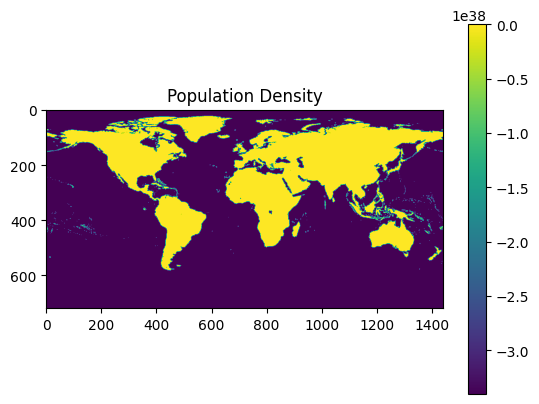

In [ ]:
# Load the TIFF file for worldpopulation
tiff_path = '/content/drive/MyDrive/AIRCentre/gpw_v4_population_density_rev11_2020_15_min.tif'
with rasterio.open(tiff_path, crs=shapefile.crs) as src:
    tiff_crs = src.crs
    # Read the image data
    tiff_data = src.read(1)
    # Plot the image
    plt.imshow(tiff_data, cmap='viridis')
    plt.colorbar()
    plt.title('Population Density')
    plt.show()


In [ ]:
# Reproject the shapefile to match the CRS of the TIFF file
shapefile_reproj = shapefile.to_crs(tiff_crs)

In [ ]:
# initialize the list of population density
pop_dens = []

# loop through each entry in the table (df)
for index, row in df.iterrows():

    # extract relevant data from the row
    area_id = row['AREAID']
    country_code = row['NAME_0']

    # select the relevant region from the shapefile
    region = shapefile_reproj.loc[shapefile_reproj['AREAID'] == area_id].iloc[0]

    # zonal statistics
    # extract mean population density for region from the tiff file
    with rasterio.open(tiff_path, crs=shapefile.crs) as src:
        affine = src.transform
        stats = zonal_stats(region.geometry, tiff_path, affine=affine, stats=['mean'])
        pop_dens.append(stats[0]['mean'])
        print(country_code)
        print(stats[0]['mean'])


# append list of mean population density to the initial table as column
df['POP_DENS'] = pop_dens


USA (North America)
33.71645906727059
Brazil (Central & South America)
26.464703553835328
Albania (Europe)
102.63548309948979
Italy (Europe)
222.3853528674833
France (Europe)
129.59582004416094
Guam (Australasia & Pacific Islands)
434.6869812011719
Indonesia (Australasia & Pacific Islands)
153.5061199510404
Papua New Guinea (Australasia & Pacific Islands)
19.900408063616073
Solomon Islands (Australasia & Pacific Islands)
21.14157516891892
Mexico (North America)
70.5849174954792
Fiji (Australasia & Pacific Islands)
52.32808939615885
Palestine (Middle East)
786.5289713541666
Cuba (Central & South America)
110.38383374183006
Cayman Islands (Central & South America)
None
Dominican Republic (Central & South America)
216.92385912698413
Colombia (Central & South America)
55.48842905405405
Argentina (Central & South America)
16.975328486089296
Honduras (Central & South America)
85.09396484375
Montenegro (Europe)
49.279326171875
Greece (Europe)
65.6089126660628
Croatia (Europe)
76.9980197482638

# Export Result

In [ ]:
# save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/AIRCentre/population_density.xlsx', index=False)
